In [1]:
import pandas as pd

In [16]:
import pandas as pd
# Load the dataset into a Pandas datafram  
df = pd.read_csv('wine.data')
print(df.head())

   1  14.23  1.71  2.43  15.6  127   2.8  3.06   .28  2.29  5.64  1.04  3.92  \
0  1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28  4.38  1.05  3.40   
1  1  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81  5.68  1.03  3.17   
2  1  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18  7.80  0.86  3.45   
3  1  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82  4.32  1.04  2.93   
4  1  14.20  1.76  2.45  15.2  112  3.27  3.39  0.34  1.97  6.75  1.05  2.85   

   1065  
0  1050  
1  1185  
2  1480  
3   735  
4  1450  


In [17]:
# Split the dataframe into features and target variables
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values
# Print the first 5 rows of each dataframe to verify they have been loaded correctly
print("Features:")
print(X[:5])
print("Target:")
print(y[:5])


Features:
[[1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]
 [1.420e+01 1.760e+00 2.450e+00 1.520e+01 1.120e+02 3.270e+00 3.390e+00
  3.400e-01 1.970e+00 6.750e+00 1.050e+00 2.850e+00 1.450e+03]]
Target:
[1 1 1 1 1]


In [21]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
# Perform missing value imputation
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imputed = imputer.fit_transform(X)
# Perform scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

In [23]:
X_scaled

array([[ 0.2558245 , -0.50162433, -0.8244853 , ...,  0.40709978,
         1.13169801,  0.97105248],
       [ 0.20622873,  0.01802001,  1.10768971, ...,  0.3195674 ,
         0.80457911,  1.40099798],
       [ 1.70650069, -0.34931478,  0.48793547, ..., -0.4244579 ,
         1.20281081,  2.34050852],
       ...,
       [ 0.34261709,  1.73822194, -0.38701171, ..., -1.60614514,
        -1.48525319,  0.28632445],
       [ 0.21862767,  0.22408586,  0.01400575, ..., -1.56237895,
        -1.39991783,  0.30224836],
       [ 1.40892609,  1.57695301,  1.36288264, ..., -1.51861275,
        -1.42836295, -0.58949046]])

[0.35983071 0.1924128  0.1117946  0.07111109 0.06628744 0.04960367
 0.04246014 0.02697991 0.02224462 0.01898528 0.01734155 0.01295206
 0.00799613]


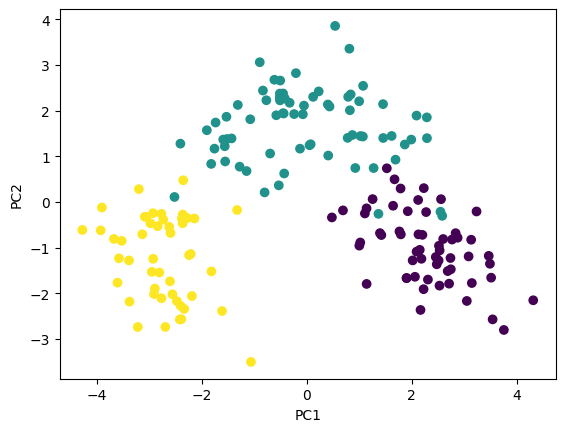

In [27]:
from sklearn.decomposition import PCA
# Implement PCA on the preprocessed dataset
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
# Determine the optimal number of principal components to retain based on the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)
# Visualise the results of PCA using a scatter plot
import matplotlib.pyplot as plt
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [28]:
from sklearn.cluster import KMeans
# Initialize the KMeans object with the desired number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
# Fit the KMeans model to the PCA-transformed data
kmeans.fit(X_pca)
# Get the cluster labels for each data point
labels = kmeans.labels_
# Print the cluster labels for the first 10 data points
print(labels[:10])


/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 1 1 1 1 1 1 1 1 1]
